# 1. Постановка задачи 

Необходимо классифицировать фирму на основе двух показателей - соотношения "быстроты активов" и текущих пассивов (x1) и соотношения прибыли и процентных ставок (x2), используя три метода классификации - метод опорных векторов, наивный Байесовский классификатор и метод k-ближайших соседей. Также требуется провести исследование результатов работы алгоритмов классификации в зависимости от параметров используемых методов, сравнить результаты и сделать вывод о наиболее подходящем методе решения задачи.


# 2. CSV-файл

Файл содержит данные обучающей выборки.

In [262]:
from IPython.core.interactiveshell import dis
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('df.csv', index_col=0, header=[0, 1])

display(df)

№  Фирмы уклоняющиеся от налогов      Фирмы не уклоняющиеся от налогов     
                              x1   x2                               x1   x2
1                            740  680                              750  590
2                            670  600                              360  600
3                            560  550                              720  750
4                            540  520                              540  710
5                            590  540                              570  700
6                            590  700                              520  670
7                            470  600                              590  790
8                            560  540                              670  700
9                            540  630                              620  730
10                           500  600                              690  840
11                             0    0                              610  680
12                             0    0                              550  730
13                             0    0                              590  750

# 3. Описание трех методов решения задачи классификации


Для решения задачи классификации мы будем использовать следующие методы: 

In [263]:
from matplotlib import pyplot as plt
import numpy as np
from numpy.random import default_rng
from sklearn.datasets import make_blobs

data = df[[('Фирмы уклоняющиеся от налогов', 'x1'), ('Фирмы уклоняющиеся от налогов', 'x2'), ('Фирмы не уклоняющиеся от налогов', 'x1'), ('Фирмы не уклоняющиеся от налогов', 'x2')]].to_numpy()

X_train = np.concatenate((data[:10, :2], data[:, 2:4]), axis=0)
y_train = np.array([1] * 10 + [2] * (len(X_train) - 10))

X_test = [[740, 590]]

* ### **Метод опорных векторов**
> Метод опорных векторов (Support Vector Machine, SVM) - это метод машинного обучения, который позволяет построить гиперплоскость в многомерном пространстве, разделяющую объекты разных классов. Основная идея метода заключается в поиске такой гиперплоскости, которая бы максимизировала расстояние от нее до ближайших объектов обучающей выборки - опорных векторов.


In [264]:
def visualize_svm(model, X_data, y_data, test, title="", resolution=10):

    s_vectors = model.support_vectors_
    
    plt.scatter(X_data[:10, 0], X_data[:10, 1], s=50, color='black', edgecolor='red', linewidths=1, label="1) Уклолняющиеся", zorder=2)
    plt.scatter(X_data[10:, 0], X_data[10:, 1], s=50, color=(0.9,0.5,0,0.15), edgecolor=(1,0,0,1), linewidths=1, label="2) Не уклоняющиеся", zorder=2)

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], resolution)
    yy = np.linspace(ylim[0], ylim[1], resolution)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    
    plt.scatter(s_vectors[:, 0], s_vectors[:, 1], linewidth=1, s=200, marker="h",
                facecolors="none", edgecolors="black", label='Support vectors', zorder=2)
    plt.scatter(test[0][0], test[0][1], marker='*', s=100, color='blue')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()

    plt.show()

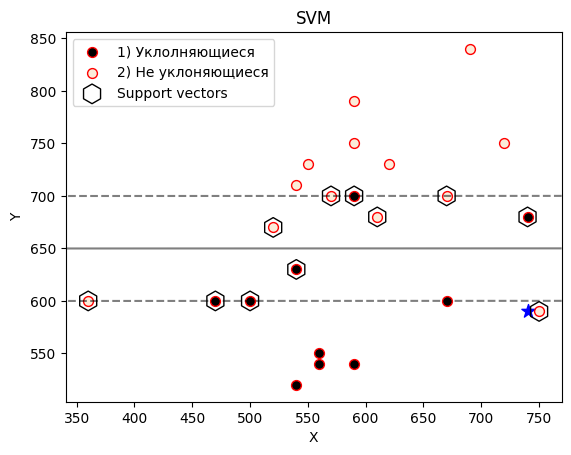

In [265]:
from sklearn.svm import SVC

# Создание экземпляра класса SVM и обучение его на обучающих данных
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)

# Классификация тестовых данных
predicted_class_svm = svm.predict(X_test)

# Визуализация результата классификации
visualize_svm(svm, X_train, y_train, X_test, "SVM", len(X_train))
plt.show()


* ### **Наивный Байесовский классификатор**
> Наивный Байесовский классификатор (Naive Bayes classifier) - это вероятностный метод классификации, основанный на теореме Байеса. Он предполагает, что все признаки объектов являются независимыми друг от друга, и на основе этого строит вероятностную модель для каждого класса. При классификации объекта, используется эта вероятностная модель, чтобы определить, к какому классу он относится.

In [266]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

predicted_class_gnb = gnb.predict(X_test)

* ### **Метод K-ближайших соседей**
> Метод K-ближайших соседей (K-Nearest Neighbors, KNN) - это метод классификации, основанный на поиске K ближайших соседей обучающей выборки для каждого тестового объекта и определении наиболее часто встречающегося класса среди этих соседей. Расстояние между объектами может быть определено различными способами, например, евклидово расстояние или косинусное расстояние.

In [267]:
class KNeighborsСlassifier:
    def fit(self, data, classes):
        # Инициализация признаков и классов
        self.X = data
        self.y = classes
        
        # Количество уникальных классов
        self.count_classes = classes.max() + 1
        
    def classify(self, x, k, print_distances=False): 
        # Рассчитываем расстояние между вектором признаков x и каждым вектором в тренировочной выборке
        dists = [np.linalg.norm(self.X[i] - x) for i in range(len(self.X))]
        
        # Объединяем расстояния и соответствующие им классы в кортежи, сортируем по расстоянию
        marked_dists = list(zip(dists, self.y))
        marked_dists.sort() 
        
        # Считаем голоса за каждый класс среди k ближайших соседей
        scores = np.zeros(self.count_classes)
        for i in range(k):
            if print_distances:
                # Выводим расстояние до k ближайших соседей
                print(f"dictance to {i + 1} point: {marked_dists[i][0]} (class = {marked_dists[i][1]})")
            scores[marked_dists[i][1]] += 1
            
        # Возвращаем предсказанный класс
        return np.argmax(scores)
    
    def predict(self, X_test, k):
        # Создаем пустой массив для предсказаний
        predictions = np.empty(len(X_test))
        for i in range(len(X_test)):
            # Классифицируем каждую точку в тестовой выборке
            predictions[i] = self.classify(X_test[i], k)
            
        # Возвращаем массив с предсказаниями
        return predictions


In [268]:
knn = KNeighborsСlassifier()

knn.fit(X_train, y_train)

predicted_class_knn = knn.classify(X_test, len(X_train))

# 4. Исследование результатов работы алгоритмов классификации в зависимости от параметров используемых методов

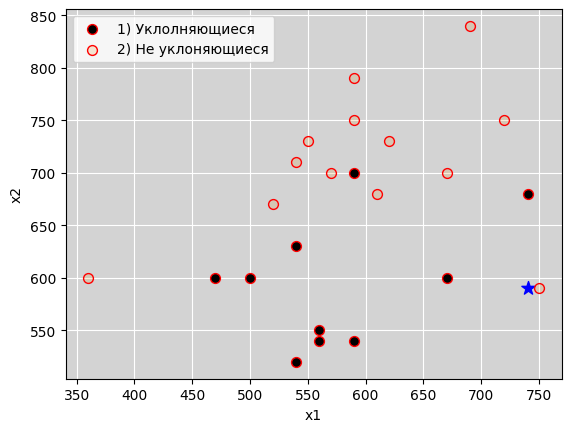

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

Ma1 = df.loc[:10, ('Фирмы уклоняющиеся от налогов', 'x1')]
Ma2 = df.loc[:10, ('Фирмы уклоняющиеся от налогов', 'x2')]
Mb1 = df[('Фирмы не уклоняющиеся от налогов', 'x1')]
Mb2 = df[('Фирмы не уклоняющиеся от налогов', 'x2')]

plt.gca().set_facecolor('lightgrey')
plt.grid(color='white', linestyle='-')

plt.scatter(Ma1, Ma2, s=50, color='black', edgecolor='red', linewidths=1, label="1) Уклолняющиеся", zorder=2)
plt.scatter(Mb1, Mb2, s=50, color=(0.9,0.5,0,0.15), edgecolor=(1,0,0,1), linewidths=1, label="2) Не уклоняющиеся", zorder=2)
plt.scatter(X_test[0][0], X_test[0][1], marker='*', s=100, color='blue')

plt.xlabel('x1')
plt.ylabel('x2')

plt.legend()

plt.show()

In [270]:
print(f"Алгоритм классификации методом:\n\t• Метод опорных векторов = {predicted_class_svm[0]}\n\t• Наивным Байесовским классификатором = {predicted_class_gnb[0]}\n\t• K-ближайших соседей = {predicted_class_knn}")

Алгоритм классификации методом:
	• Метод опорных векторов = 1
	• Наивным Байесовским классификатором = 1
	• K-ближайших соседей = 2


Для выбора наилучшего метода классификации нужно провести сравнительный анализ трех алгоритмов: метода опорных векторов, наивного Байесовского классификатора и метода K-ближайших соседей.

* Начнем с худшего метода. **Метод наивного Байесовского классификатора** может работать хорошо, когда классы в данных сильно отделены друг от друга, но в данном случае данные не обладают такими свойствами. Кроме того, этот метод не учитывает корреляцию между признаками, что может привести к низкой точности классификации.

* **Метод K-ближайших соседей (KNN)** может быть хорошим выбором, если выборка не очень большая. Но в этой задаче выборка содержит 13 записей, что не является очень большой, но и не очень маленькой. Однако KNN может быть восприимчивым к шуму и выбросам, которые могут быть в данных.

* Метод опорных векторов (SVM) **Текст, выделенный полужирным шрифтом** может быть наилучшим выбором для решения этой задачи, потому что он пытается найти оптимальную разделяющую гиперплоскость между двумя классами, которая максимизирует зазор между ними. Это делает SVM эффективным в случаях, когда классы сложно разделимы, и когда у нас мало данных. Кроме того, SVM устойчив к выбросам и шуму в данных.

Таким образом, лучшим выбором для решения этой задачи может быть метод опорных векторов.